In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist, pdist

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore') 

In [2]:
path = './school_data/'

In [3]:
school = pd.read_csv(path+'위해지표_전처리_500m.csv')
school.head(10)
school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   학교명                 320 non-null    object 
 1   학교코드                320 non-null    object 
 2   지역                  320 non-null    object 
 3   법정동코드               320 non-null    int64  
 4   위도                  320 non-null    float64
 5   경도                  320 non-null    float64
 6   개최횟수                320 non-null    int64  
 7   심의건수                320 non-null    int64  
 8   학교장의 자체해결건수         320 non-null    int64  
 9   피해학생수               320 non-null    int64  
 10  피해학생_보호조치건수         320 non-null    int64  
 11  가해학생수               320 non-null    int64  
 12  선도·교육
조치건수          320 non-null    int64  
 13  신체폭력                320 non-null    int64  
 14  언어폭력                320 non-null    int64  
 15  금품갈취                320 non-null    int64  
 16  강요      

In [4]:
school['500미터내_청소년유해업소_계'] = school['500미터내_청소년출입금지업소개수']+school['500미터내_청소년고용금지업소개수']
school

,학교명,학교코드,지역,법정동코드,위도,경도,개최횟수,심의건수,학교장의 자체해결건수,피해학생수,...,금품갈취,강요,따돌림,성폭력,사이버폭력,기타,학교폭력유형건수_합계,500미터내_청소년출입금지업소개수,500미터내_청소년고용금지업소개수,500미터내_청소년유해업소_계
0,개포고등학교,S010000373,강남구,1168010300,37.484959,127.059405,4,0,0,0,...,0,0,0,0,0,0,0,13,60,73
1,경기고등학교,S010000375,강남구,1168010500,37.517566,127.056074,4,10,9,5,...,0,0,0,0,2,0,10,40,192,232
2,경기여자고등학교,S010000376,강남구,1168010300,37.486887,127.065567,4,0,0,0,...,0,0,0,0,0,0,0,12,81,93
3,국립국악고등학교,S000003540,강남구,1168010300,37.476230,127.051476,4,0,0,0,...,0,0,0,0,0,0,0,13,89,102
4,단국대학교부속소프트웨어고등학교,S010000581,강남구,1168010600,37.495617,127.057767,7,5,1,4,...,0,0,0,1,0,0,5,30,198,228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,무학여자고등학교,S010000436,성동구,1120010700,37.556768,127.033599,8,2,0,2,...,0,0,0,0,0,0,3,60,244,304
316,서울방송고등학교,S010000585,성동구,1120011300,37.547773,127.011036,4,2,0,6,...,0,0,0,1,1,0,2,37,157,194
317,성수고등학교,S010005523,성동구,1120011400,37.547342,127.038253,4,4,0,5,...,1,0,0,0,0,0,3,3,25,28
318,성수공업고등학교,S010000592,성동구,1120011500,37.540540,127.051298,8,7,0,7,...,6,0,0,4,0,0,29,54,291,345


In [5]:
school_info = school[['학교코드','학교명','지역','법정동코드','위도','경도']]
df = school.iloc[:,6:]
labels= np.array(school['학교코드'])

In [6]:
df.corr()

,개최횟수,심의건수,학교장의 자체해결건수,피해학생수,피해학생_보호조치건수,가해학생수,선도·교육\n조치건수,신체폭력,언어폭력,금품갈취,강요,따돌림,성폭력,사이버폭력,기타,학교폭력유형건수_합계,500미터내_청소년출입금지업소개수,500미터내_청소년고용금지업소개수,500미터내_청소년유해업소_계
개최횟수,1.000000,0.657802,0.361863,0.558343,0.416174,0.535145,0.543969,0.597475,0.358901,0.198729,0.224753,0.191970,0.328218,0.236426,0.038156,0.613103,-0.082705,-0.079751,-0.082614
심의건수,0.657802,1.000000,0.545479,0.714648,0.550975,0.710222,0.672056,0.725236,0.493437,0.245761,0.394138,0.336648,0.445430,0.358849,0.103229,0.816773,-0.089456,-0.088345,-0.091008
학교장의 자체해결건수,0.361863,0.545479,1.000000,0.468200,0.379631,0.401913,0.375402,0.444303,0.314859,0.168255,0.455615,0.333571,0.232731,0.225357,0.064213,0.541419,-0.026037,-0.021236,-0.022942
피해학생수,0.558343,0.714648,0.468200,1.000000,0.801331,0.710578,0.670935,0.590542,0.413154,0.251098,0.478213,0.351087,0.445020,0.395398,0.094197,0.736382,-0.086347,-0.088994,-0.090792
피해학생_보호조치건수,0.416174,0.550975,0.379631,0.801331,1.000000,0.571813,0.583642,0.481926,0.394817,0.205837,0.418531,0.416336,0.359587,0.283404,0.113385,0.635212,-0.060472,-0.083802,-0.080598
가해학생수,0.535145,0.710222,0.401913,0.710578,0.571813,1.000000,0.884803,0.663406,0.505229,0.250123,0.319188,0.294078,0.390969,0.276046,0.098494,0.750871,-0.080925,-0.064564,-0.070164
선도·교육\n조치건수,0.543969,0.672056,0.375402,0.670935,0.583642,0.884803,1.000000,0.676578,0.507559,0.294954,0.301998,0.240097,0.432791,0.257744,0.081542,0.759752,-0.055370,-0.054215,-0.055961
신체폭력,0.597475,0.725236,0.444303,0.590542,0.481926,0.663406,0.676578,1.000000,0.453201,0.429416,0.236045,0.123324,0.306680,0.127943,-0.001797,0.853334,-0.059722,-0.068314,-0.068153
언어폭력,0.358901,0.493437,0.314859,0.413154,0.394817,0.505229,0.507559,0.453201,1.000000,0.122855,0.270585,0.184536,0.155812,0.111663,-0.005535,0.695545,-0.099628,-0.081528,-0.087999
금품갈취,0.198729,0.245761,0.168255,0.251098,0.205837,0.250123,0.294954,0.429416,0.122855,1.000000,0.250517,0.059202,0.149296,0.047487,0.038735,0.462641,0.050940,0.087101,0.080972


In [7]:
# model 사용변수 선정

df = df[['학교폭력유형건수_합계','500미터내_청소년출입금지업소개수','개최횟수','심의건수','피해학생수','가해학생수','신체폭력']]

***
## K-Means Clustering

In [8]:
# 표준화
sd = StandardScaler()
df_sd = pd.DataFrame(sd.fit_transform(df))
df_sd.index = labels

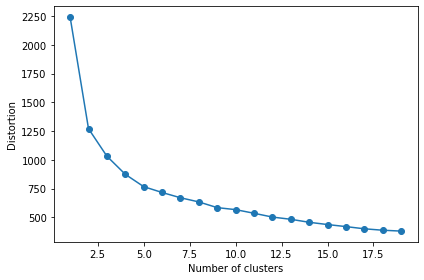

In [9]:
dist =[]
for i in range(1,20):
    k = KMeans(n_clusters=i,init='k-means++',
           n_init=10, max_iter=300, random_state=0)
    k.fit(df_sd)
    dist.append(k.inertia_)

plt.plot(range(1,20), dist, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

In [10]:
df_sd_arr = df_sd.values

#k값을 5로 설정 후 k-means에 적용시키기
kmeans = KMeans(n_clusters = 4,random_state=2021).fit(df_sd_arr)
kmeans.cluster_centers_

array([[-0.56545368, -0.40820474, -0.46520463, -0.58853314, -0.52397752,
        -0.61880378, -0.54512022],
       [ 2.21627317, -0.09882898,  1.67897677,  1.87331831,  1.79290049,
         1.83346232,  2.02732209],
       [-0.48490668,  1.66232197, -0.35461727, -0.48807804, -0.44209145,
        -0.48006059, -0.49623444],
       [ 0.28760922, -0.23085303,  0.26974629,  0.46348016,  0.3668102 ,
         0.52340145,  0.33694931]])

In [11]:
df_sd['cluster'] = kmeans.labels_
df_sd

,0,1,2,3,4,5,6,cluster
S010000373,-0.915016,-0.630840,-0.513466,-0.999186,-0.800620,-0.848294,-0.748290,0
S010000375,1.448221,0.233900,-0.513466,1.972370,0.444270,-0.612247,2.402405,3
S010000376,-0.915016,-0.662867,-0.513466,-0.999186,-0.800620,-0.848294,-0.748290,0
S000003540,-0.915016,-0.630840,-0.513466,-0.999186,-0.800620,-0.848294,-0.748290,0
S010000581,0.266603,-0.086374,0.975740,0.486592,0.195292,1.040082,0.602008,3
...,...,...,...,...,...,...,...,...
S010000436,-0.206045,0.874448,1.472143,-0.404874,-0.302664,-0.376200,-0.298191,2
S010000585,-0.442368,0.137818,-0.513466,-0.404874,0.693248,-0.376200,-0.748290,0
S010005523,-0.206045,-0.951114,-0.513466,0.189437,0.444270,-0.612247,0.151909,0
S010000592,5.938371,0.682284,1.472143,1.080903,0.942226,1.748223,6.903397,1


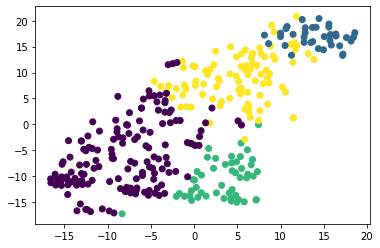

In [12]:
from sklearn.manifold import TSNE

model = TSNE(learning_rate=100)
transformed = model.fit_transform(df_sd.iloc[:,:7])

xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys,c=kmeans.labels_)

plt.show()

In [13]:
df_sd.reset_index(inplace=True)
df_sd.rename(columns={'index':'학교코드',0:'학교폭력유형_계',1:'500미터내_청소년출입금지업소개수',2:'개최횟수',3:'심의건수',4:'피해학생수',5:'가해학생수',6:'신체폭력'},inplace=True)

In [14]:
df_sd['cluster'].value_counts()

0    144
3     90
2     50
1     36
Name: cluster, dtype: int64

In [15]:
hazard = pd.merge(school_info, df_sd, on='학교코드', how='left')
# final.head()

In [16]:
hazard_score = hazard[['학교폭력유형_계','500미터내_청소년출입금지업소개수','개최횟수','심의건수','피해학생수','가해학생수','신체폭력','cluster']].groupby('cluster').mean()
# final_score = final.groupby('cluster').mean()
hazard_score

,학교폭력유형_계,500미터내_청소년출입금지업소개수,개최횟수,심의건수,피해학생수,가해학생수,신체폭력
cluster,,,,,,,
0,-0.565454,-0.408205,-0.465205,-0.588533,-0.523978,-0.618804,-0.545120
1,2.216273,-0.098829,1.678977,1.873318,1.792900,1.833462,2.027322
2,-0.484907,1.662322,-0.354617,-0.488078,-0.442091,-0.480061,-0.496234
3,0.287609,-0.230853,0.269746,0.463480,0.366810,0.523401,0.336949


In [17]:
tmp = hazard[hazard['cluster']==3]
tmp['지역'].nunique()

25

***
## 결과 해석

* **cluster 1 > cluster3 > cluster2 > cluster0**

- cluster 0 : 학교폭력 발생 건수가 낮고, 500m 내 청소년 유해업소수가 적은 학교
- cluster 1 : 학교폭력 발생 건수가 전체적으로 높음, 500m 내 청소년 유해업소수가 상대적으로 많음
- cluster 2 : 학교폭력 발생 건수가 낮음, 500m 내 청소년 유해업소수가 많음
- cluster 3 : 학교폭력 발생 건수가 다소 높음, 500m 내 청소년 유해업소수가 적은 편

***
## 위해지표 점수 산출

### 1차 점수

In [18]:
rank = hazard_score.sort_values('심의건수').index

In [19]:
hazard['score_1st'] = ''

In [20]:
for i in range(len(hazard)):
    if hazard['cluster'][i]==rank[0]:
        hazard['score_1st'][i]=0.25
    elif hazard['cluster'][i]==rank[1]:
        hazard['score_1st'][i]=0.5
    elif hazard['cluster'][i]==rank[2]:
        hazard['score_1st'][i]=0.75
    elif hazard['cluster'][i]==rank[3]:
        hazard['score_1st'][i]=1

In [21]:
hazard

,학교코드,학교명,지역,법정동코드,위도,경도,학교폭력유형_계,500미터내_청소년출입금지업소개수,개최횟수,심의건수,피해학생수,가해학생수,신체폭력,cluster,score_1st
0,S010000373,개포고등학교,강남구,1168010300,37.484959,127.059405,-0.915016,-0.630840,-0.513466,-0.999186,-0.800620,-0.848294,-0.748290,0,0.25
1,S010000375,경기고등학교,강남구,1168010500,37.517566,127.056074,1.448221,0.233900,-0.513466,1.972370,0.444270,-0.612247,2.402405,3,0.75
2,S010000376,경기여자고등학교,강남구,1168010300,37.486887,127.065567,-0.915016,-0.662867,-0.513466,-0.999186,-0.800620,-0.848294,-0.748290,0,0.25
3,S000003540,국립국악고등학교,강남구,1168010300,37.476230,127.051476,-0.915016,-0.630840,-0.513466,-0.999186,-0.800620,-0.848294,-0.748290,0,0.25
4,S010000581,단국대학교부속소프트웨어고등학교,강남구,1168010600,37.495617,127.057767,0.266603,-0.086374,0.975740,0.486592,0.195292,1.040082,0.602008,3,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,S010000436,무학여자고등학교,성동구,1120010700,37.556768,127.033599,-0.206045,0.874448,1.472143,-0.404874,-0.302664,-0.376200,-0.298191,2,0.50
316,S010000585,서울방송고등학교,성동구,1120011300,37.547773,127.011036,-0.442368,0.137818,-0.513466,-0.404874,0.693248,-0.376200,-0.748290,0,0.25
317,S010005523,성수고등학교,성동구,1120011400,37.547342,127.038253,-0.206045,-0.951114,-0.513466,0.189437,0.444270,-0.612247,0.151909,0,0.25
318,S010000592,성수공업고등학교,성동구,1120011500,37.540540,127.051298,5.938371,0.682284,1.472143,1.080903,0.942226,1.748223,6.903397,1,1


### 2차 점수

In [27]:
df = pd.read_csv(path+'서울시고등학교_기본정보.csv', encoding = 'cp949')
df = df[['지역','학교코드','학교명','학급당 학생수','수업 교원 1인당 학생수']]

In [28]:
hazard_2nd = pd.merge(hazard,df[['학교코드','수업 교원 1인당 학생수']],how='left',on='학교코드')
hazard_2nd

,학교코드,학교명,지역,법정동코드,위도,경도,학교폭력유형_계,500미터내_청소년출입금지업소개수,개최횟수,심의건수,피해학생수,가해학생수,신체폭력,cluster,score_1st,수업 교원 1인당 학생수
0,S010000373,개포고등학교,강남구,1168010300,37.484959,127.059405,-0.915016,-0.630840,-0.513466,-0.999186,-0.800620,-0.848294,-0.748290,0,0.25,10.9
1,S010000375,경기고등학교,강남구,1168010500,37.517566,127.056074,1.448221,0.233900,-0.513466,1.972370,0.444270,-0.612247,2.402405,3,0.75,13.5
2,S010000376,경기여자고등학교,강남구,1168010300,37.486887,127.065567,-0.915016,-0.662867,-0.513466,-0.999186,-0.800620,-0.848294,-0.748290,0,0.25,13.6
3,S000003540,국립국악고등학교,강남구,1168010300,37.476230,127.051476,-0.915016,-0.630840,-0.513466,-0.999186,-0.800620,-0.848294,-0.748290,0,0.25,10.8
4,S010000581,단국대학교부속소프트웨어고등학교,강남구,1168010600,37.495617,127.057767,0.266603,-0.086374,0.975740,0.486592,0.195292,1.040082,0.602008,3,0.75,6.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,S010000436,무학여자고등학교,성동구,1120010700,37.556768,127.033599,-0.206045,0.874448,1.472143,-0.404874,-0.302664,-0.376200,-0.298191,2,0.50,11.4
316,S010000585,서울방송고등학교,성동구,1120011300,37.547773,127.011036,-0.442368,0.137818,-0.513466,-0.404874,0.693248,-0.376200,-0.748290,0,0.25,10.3
317,S010005523,성수고등학교,성동구,1120011400,37.547342,127.038253,-0.206045,-0.951114,-0.513466,0.189437,0.444270,-0.612247,0.151909,0,0.25,9.8
318,S010000592,성수공업고등학교,성동구,1120011500,37.540540,127.051298,5.938371,0.682284,1.472143,1.080903,0.942226,1.748223,6.903397,1,1,6.8


In [29]:
hazard_2nd['score_2nd']=''

In [41]:
for k in range(4):
    rank_lis = sorted(list(set(hazard_2nd[hazard_2nd['cluster']==k]['수업 교원 1인당 학생수'])), reverse=True)
    for i in range(len(hazard_2nd)):
        for j in range(len(rank_lis)):
            if hazard_2nd['수업 교원 1인당 학생수'][i] == rank_lis[j]:
                hazard_2nd['score_2nd'][i] = round((hazard_2nd['score_1st'][i]-(j/len(rank_lis))*0.2)*10,2)

In [42]:
hazard_2nd

,학교코드,학교명,지역,법정동코드,위도,경도,학교폭력유형_계,500미터내_청소년출입금지업소개수,개최횟수,심의건수,피해학생수,가해학생수,신체폭력,cluster,score_1st,수업 교원 1인당 학생수,score_2nd
0,S010000373,개포고등학교,강남구,1168010300,37.484959,127.059405,-0.915016,-0.630840,-0.513466,-0.999186,-0.800620,-0.848294,-0.748290,0,0.25,10.9,1.18
1,S010000375,경기고등학교,강남구,1168010500,37.517566,127.056074,1.448221,0.233900,-0.513466,1.972370,0.444270,-0.612247,2.402405,3,0.75,13.5,6.89
2,S010000376,경기여자고등학교,강남구,1168010300,37.486887,127.065567,-0.915016,-0.662867,-0.513466,-0.999186,-0.800620,-0.848294,-0.748290,0,0.25,13.6,1.79
3,S000003540,국립국악고등학교,강남구,1168010300,37.476230,127.051476,-0.915016,-0.630840,-0.513466,-0.999186,-0.800620,-0.848294,-0.748290,0,0.25,10.8,1.11
4,S010000581,단국대학교부속소프트웨어고등학교,강남구,1168010600,37.495617,127.057767,0.266603,-0.086374,0.975740,0.486592,0.195292,1.040082,0.602008,3,0.75,6.9,5.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,S010000436,무학여자고등학교,성동구,1120010700,37.556768,127.033599,-0.206045,0.874448,1.472143,-0.404874,-0.302664,-0.376200,-0.298191,2,0.50,11.4,3.82
316,S010000585,서울방송고등학교,성동구,1120011300,37.547773,127.011036,-0.442368,0.137818,-0.513466,-0.404874,0.693248,-0.376200,-0.748290,0,0.25,10.3,1.19
317,S010005523,성수고등학교,성동구,1120011400,37.547342,127.038253,-0.206045,-0.951114,-0.513466,0.189437,0.444270,-0.612247,0.151909,0,0.25,9.8,0.86
318,S010000592,성수공업고등학교,성동구,1120011500,37.540540,127.051298,5.938371,0.682284,1.472143,1.080903,0.942226,1.748223,6.903397,1,1,6.8,8.10


In [43]:
# for i in range(len(hazard_2nd)):
#     for k in range(4):
#         rank_lis = sorted(list(set(hazard_2nd[hazard_2nd['cluster']==k]['수업 교원 1인당 학생수'])), reverse=True) #한 군집내의 모든 인구밀도 내림차순 정렬
#         for j in range(len(rank_lis)): #내림차순 정렬한 리스트의 인덱스 순서대로 적은 점수를 차감
#             if hazard_2nd['수업 교원 1인당 학생수'][i] == rank_lis[j]:
#                 hazard_2nd['score_2nd'][i] = round((hazard_2nd['score_1st'][i]-(j/len(rank_lis))*0.2)*10,2) # 점수 만점을 10점으로 만들기

In [44]:
hazard_fin = hazard_2nd[['학교코드','학교명','지역','위도','경도','score_2nd']]
hazard_fin.sort_values(by=['score_2nd'], ascending=[False]).head(30)

,학교코드,학교명,지역,위도,경도,score_2nd
21,S010000568,휘문고등학교,강남구,37.505109,127.061420,10.00
307,S010000473,세화고등학교,서초구,37.501952,126.991618,9.93
302,S010000452,상문고등학교,서초구,37.479755,127.003916,9.82
183,S010000467,선정고등학교,은평구,37.618704,126.909031,9.79
92,S010000383,경인고등학교,구로구,37.495994,126.865431,9.75
113,S010000386,계성고등학교,성북구,37.607710,127.020310,9.59
244,S010000494,염광고등학교,노원구,37.628422,127.049528,9.44
95,S010000399,구일고등학교,구로구,37.494410,126.873942,9.39
79,S010000484,신림고등학교,관악구,37.478383,126.916640,9.32
175,S010000511,용산고등학교,용산구,37.545865,126.980328,9.25


In [45]:
len(hazard_fin)

320